In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# **FLOTACIÓN**

## Flotación sin recirculación
$\frac {A}{S} = \frac{1.3*So_{a}*(f*p-1)}{S_a}$

## Flotación con recirculación
$\frac {A}{S} = \frac{1.3*So_{a}*(f*p-1)*R}{S_a * Q}$

## Presión

$P = {\frac{p_{cal}+101.325}{101.325}}$

## Unidades

$\frac{A}{S}:\frac{ml}{mg}$ <br>
$So_{a}: \frac{ml}{l}$ <br>
$f: adimensional$ <br>
$P: atm$<br>
$P_{cal}: kPa$<br>
$R: \frac{m^3}{d}$<br>
$Q: \frac{m^3}{d}$<br>
$S_a: \frac{mg}{l}$

**A/S**: relación volumen de aire y masa del sólido, mlaire / mgsólido. Rango: 0.005 – 0.06. <br>
**Soa**: solubilidad del aire, ml/l <br>
**f**: fracción de aire disuelto a presión P, usalmente 0.5 <br>
**P**: presión, atm <br>
**Sa**: sólidos suspendidos en el afluente, mg/l <br>
**R**: recirculación presurizada, m³/d <br>
**Q**: flujo de mezcla, m³/d

In [2]:
Solubilidad = {"Temp":[0,10,20,30],"Sol":[29.2,22.8,18.7,15.7]}
Solubilidad = pd.DataFrame(Solubilidad)
Solubilidad = Solubilidad.set_index(Solubilidad["Temp"])
Solubilidad

,Temp,Sol
Temp,,
0,0,29.2
10,10,22.8
20,20,18.7
30,30,15.7


### FLotación a diferentes presiones y solubilidades

In [3]:
Presiones = np.linspace(0.1,3.5,10)

In [4]:
def FlotacionSinR(Sol,Pres,SS):
    for i in range(4):
        AS = (1.3 * Sol.iloc[i,1]*(0.5*Pres-1))/SS
        plt.plot(Pres, AS, label=Sol.iloc[i,1])
        plt.xlabel("Presión, atm")
        plt.ylabel("Relación A/S, ${ml}/{mg}$")
        plt.title("FLotación a diferentes presiones y solubilidades")
        plt.legend(title="Solubilidad, $So_a$")

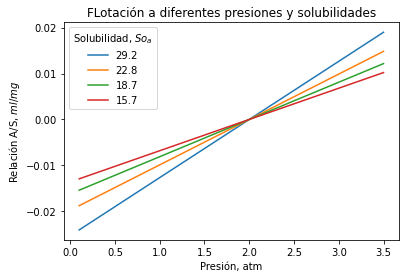

In [5]:
FlotacionSinR(Solubilidad,Presiones, 1500)

In [6]:
def FlotacionConR(Sol,Pres,SS,Flow,Rec):
    for i in range(4):
        AS = (1.3 * Sol.iloc[i,1]*(0.5*Pres-1)*Rec)/(SS*Flow)
        plt.plot(Pres, AS, label=Sol.iloc[i,1])
        plt.xlabel("Presión, atm")
        plt.ylabel("Relación A/S, ${ml}/{mg}$")
        plt.title("FLotación a diferentes presiones y solubilidades")
        plt.legend(title="Solubilidad, $So_a$")

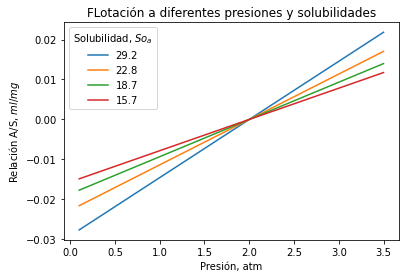

In [7]:
FlotacionConR(Solubilidad,Presiones, 1500,400,460)

### FLotación a diferentes concentraciones de solidos y solubilidades

In [21]:
SolS = np.linspace(3000,50000, 100)

In [17]:
def FlotSinRSol(Sol,Pres,SS):
    for i in range(4):
        AS = (1.3 * Sol.iloc[i,1]*(0.5*Pres-1))/(SS)
        
        plt.plot(SS, AS, label=Sol.iloc[i,1])
        plt.xlabel("Sólidos suspendidos, mg/l")
        plt.ylabel("Relación A/S, ${ml}/{mg}$")
        plt.title("FLotación a diferentes concentraciones de sólidos y solubilidades")
        plt.legend(title="Solubilidad, $So_a$")

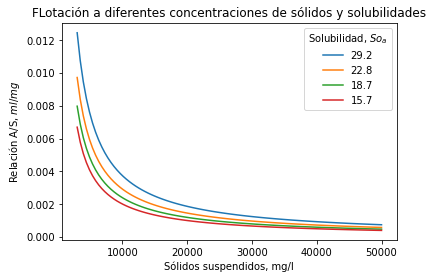

In [29]:
FlotSinRSol(Solubilidad,3.97,SolS)

In [30]:
def FlotConRSol(Sol,Pres,SS,Flow,Rec):
    for i in range(4):
        AS = (1.3 * Sol.iloc[i,1]*(0.5*Pres-1)*Rec)/(SS*Flow)
        
        plt.plot(SS, AS, label=Sol.iloc[i,1])
        plt.xlabel("Sólidos suspendidos, mg/l")
        plt.ylabel("Relación A/S, ${ml}/{mg}$")
        plt.title("FLotación a diferentes concentraciones de sólidos y solubilidades")
        plt.legend(title="Solubilidad, $So_a$")

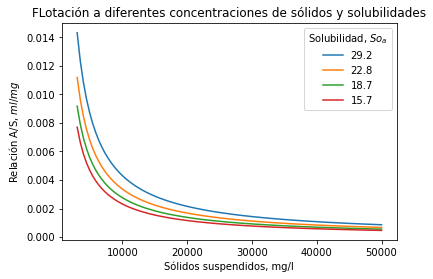

In [31]:
FlotConRSol(Solubilidad,3.97,SolS,400,460)

# TRANSFERENCIA DE OXÍGENO

$\frac {C_{s}-C_{t}}{C_{s}-C_{0}} = e^{-K_{La}*t}$

$C_{t} = C_{s}- C_{s}*e^{-K_{La}*t}$

In [32]:
Cs = 9.52 #mg/l

In [34]:
C0 = 0

In [35]:
Kla = np.linspace(0.01,0.1,10) #1/min

In [36]:
t = np.linspace(0,1440,150) #min

In [39]:
def TransferOx(ConcSat,Const,tiempo):
    for i in range(10):
        Ct = ConcSat - ConcSat*np.exp(-Const[i]*tiempo)
        plt.plot(tiempo,Ct,label= np.round(-Const[i],4))
        plt.xlabel("tiempo, min")
        plt.ylabel("Concentración O2, mg/l")
        plt.title("Efecto de la contante cinetica en la transferencia de O2 en agua")
        plt.legend(title="Constante, 1/min")

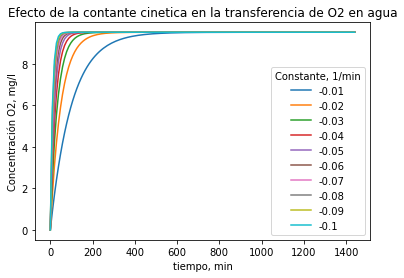

In [40]:
TransferOx(Cs,Kla,t)